In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [142]:
_data = pd.read_csv('Офіційний курс гривні щодо іноземних валют.csv')
_data.head(10)

,Дата,Час,Код цифровий,Код літерний,Кількість одиниць,Назва валюти,"Офіційний курс гривні, грн"
0,01.01.2022,0.0,840,USD,1,Долар США,27.2782
1,02.01.2022,0.0,840,USD,1,Долар США,27.2782
2,03.01.2022,0.0,840,USD,1,Долар США,27.2782
3,04.01.2022,0.0,840,USD,1,Долар США,27.2782
4,05.01.2022,0.0,840,USD,1,Долар США,27.2976
5,06.01.2022,0.0,840,USD,1,Долар США,27.4551
6,07.01.2022,0.0,840,USD,1,Долар США,27.4551
7,08.01.2022,0.0,840,USD,1,Долар США,27.4551
8,09.01.2022,0.0,840,USD,1,Долар США,27.4551
9,10.01.2022,0.0,840,USD,1,Долар США,27.4977


In [143]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Дата                        791 non-null    object 
 1   Час                         791 non-null    float64
 2   Код цифровий                791 non-null    int64  
 3   Код літерний                791 non-null    object 
 4   Кількість одиниць           791 non-null    int64  
 5   Назва валюти                791 non-null    object 
 6   Офіційний курс гривні, грн  791 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 43.4+ KB


In [144]:
_data[['Дата', 'Офіційний курс гривні, грн']].head(10)

,Дата,"Офіційний курс гривні, грн"
0,01.01.2022,27.2782
1,02.01.2022,27.2782
2,03.01.2022,27.2782
3,04.01.2022,27.2782
4,05.01.2022,27.2976
5,06.01.2022,27.4551
6,07.01.2022,27.4551
7,08.01.2022,27.4551
8,09.01.2022,27.4551
9,10.01.2022,27.4977


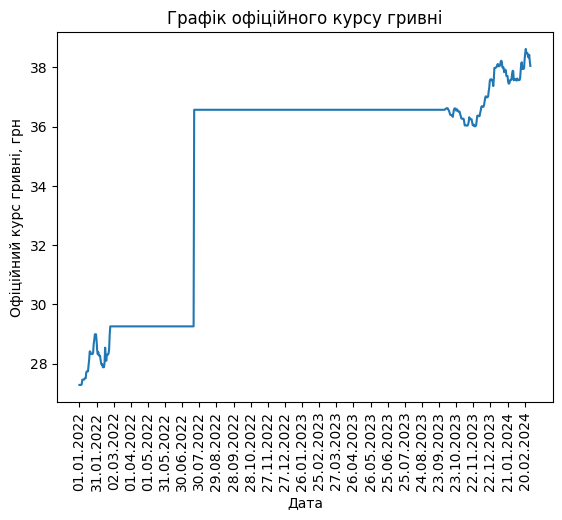

In [145]:
date = _data['Дата'].to_numpy()
value = _data['Офіційний курс гривні, грн'].to_numpy()

plt.plot(figsize=(12, 6))
plt.plot(date, value)
plt.xlabel('Дата')
plt.ylabel('Офіційний курс гривні, грн')
plt.title('Графік офіційного курсу гривні')
plt.xticks(date[::30], rotation=90)
plt.show()


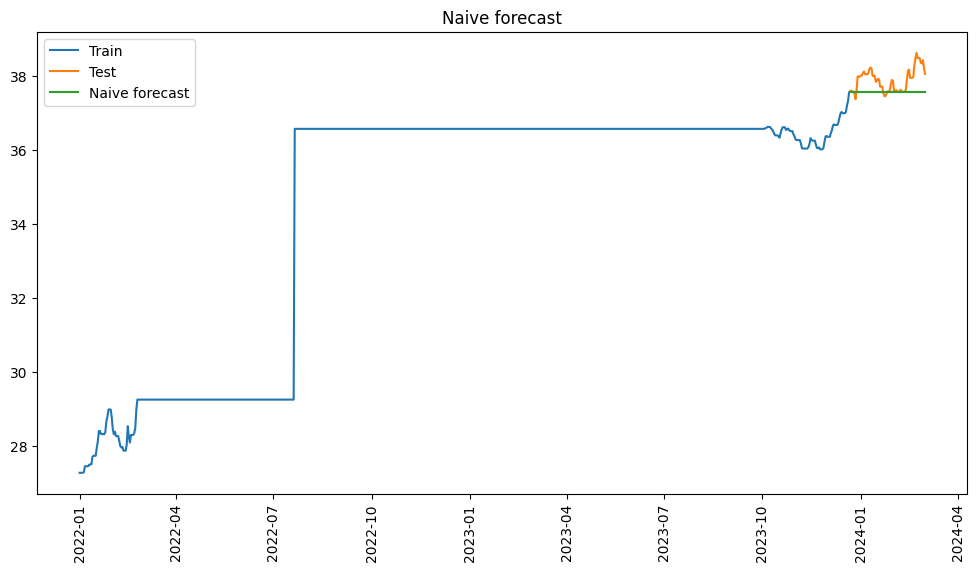

max_error: 1.072099999999999
mean_error: 0.3355126760563381
min_error: 0.0009000000000014552
median_error: 0.34609999999999985
mode_error: 0.01910000000000167


In [146]:
train_len = 720
train = _data.iloc[:train_len].copy()
test = _data.iloc[train_len:].copy()

train['Дата'] = pd.to_datetime(train['Дата'], format='%d.%m.%Y')
test['Дата'] = pd.to_datetime(test['Дата'], format='%d.%m.%Y')

train['Офіційний курс гривні, грн'] = train['Офіційний курс гривні, грн'].astype(float)
test['Офіційний курс гривні, грн'] = test['Офіційний курс гривні, грн'].astype(float)

y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Офіційний курс гривні, грн'][train_len - 1]

plt.figure(figsize=(12, 6))
plt.plot(train['Дата'], train['Офіційний курс гривні, грн'], label='Train')
plt.plot(test['Дата'], test['Офіційний курс гривні, грн'], label='Test')
plt.plot(y_hat_naive['Дата'], y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Naive forecast')
plt.xticks(rotation=90)
plt.show()

def calculation_statistic_error(y_true, y_pred):
    errors = y_true - y_pred
    return {
        'max_error': np.max(np.abs(errors)),
        'mean_error': np.mean(errors),
        'min_error': np.min(np.abs(errors)),
        'median_error': np.median(errors),
        'mode_error': stats.mode(errors)[0]
    }

errors = calculation_statistic_error(
    test['Офіційний курс гривні, грн'], 
    y_hat_naive['naive_forecast']
)

for metric, value in errors.items():
    print(f'{metric}: {value}')


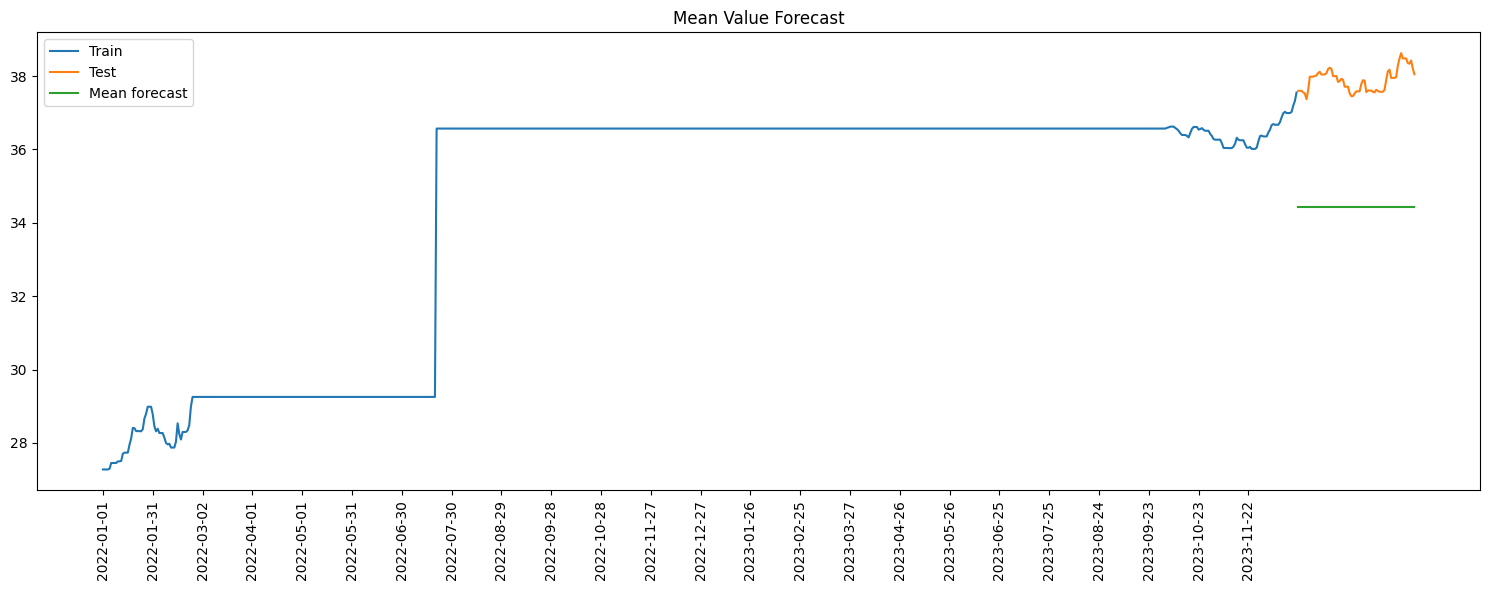

max_error: 4.196563055555551
mean_error: 3.45997573161189
min_error: 2.9412630555555523
median_error: 3.4705630555555516
mode_error: 3.1435630555555534


In [147]:
train_len = 720
train = _data.iloc[:train_len].copy()
test = _data.iloc[train_len:].copy()

train.loc[:, 'Дата'] = pd.to_datetime(train['Дата'], format='%d.%m.%Y')
test.loc[:, 'Дата'] = pd.to_datetime(test['Дата'], format='%d.%m.%Y')

train.loc[:, 'Офіційний курс гривні, грн'] = train['Офіційний курс гривні, грн'].astype(float)
test.loc[:, 'Офіційний курс гривні, грн'] = test['Офіційний курс гривні, грн'].astype(float)

y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Офіційний курс гривні, грн'].mean()

plt.figure(figsize=(15, 6))
plt.plot(train['Дата'], train['Офіційний курс гривні, грн'], label='Train')
plt.plot(test['Дата'], test['Офіційний курс гривні, грн'], label='Test')
plt.plot(y_hat_naive['Дата'], y_hat_naive['naive_forecast'], label='Mean forecast')
plt.legend()
plt.title('Mean Value Forecast')
plt.xticks(train['Дата'][::30], rotation=90)
plt.tight_layout()
plt.show()

def calculation_statistic_error(y_true, y_pred):
    errors = y_true - y_pred
    return {
        'max_error': np.max(np.abs(errors)),
        'mean_error': np.mean(errors),
        'min_error': np.min(np.abs(errors)),
        'median_error': np.median(errors),
        'mode_error': stats.mode(errors)[0]
    }

errors = calculation_statistic_error(
    test['Офіційний курс гривні, грн'], 
    y_hat_naive['naive_forecast']
)

for metric, value in errors.items():
    print(f'{metric}: {value}')

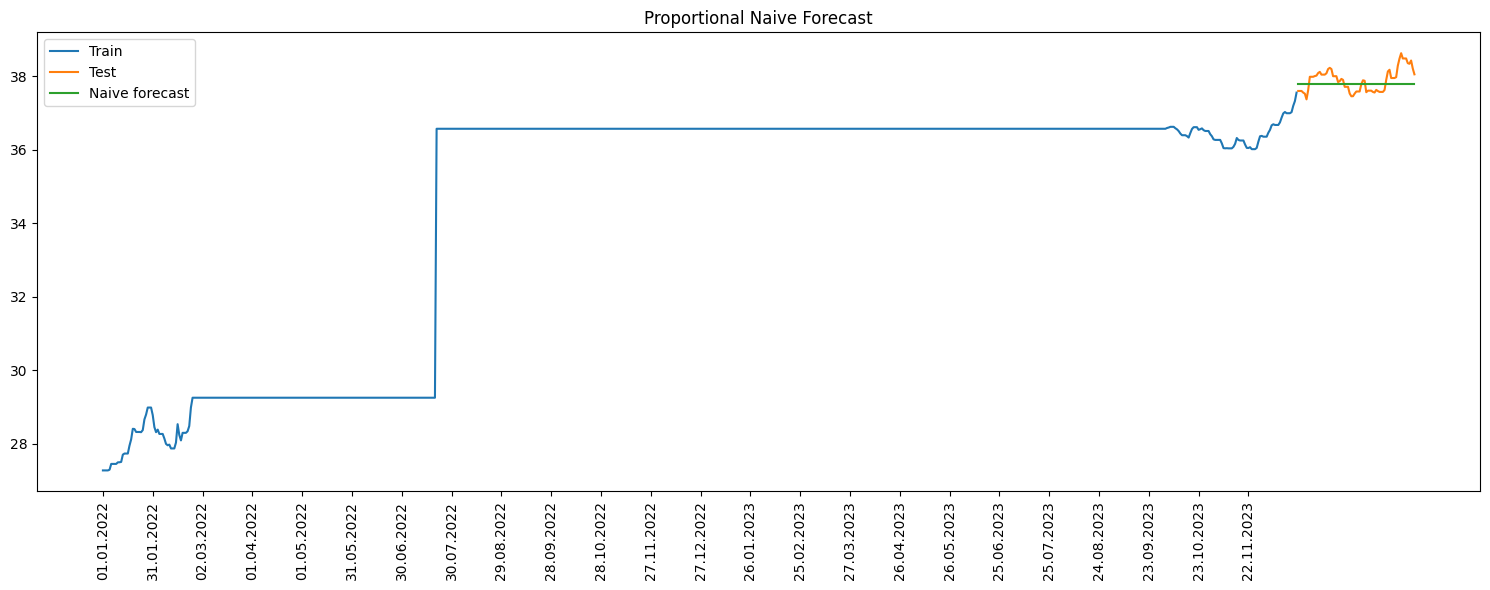

max_error: 0.8395689578113874
mean_error: 0.10298163386772655
min_error: 0.003031042188609945
median_error: 0.11356895781138832
mode_error: -0.21343104218860987


In [148]:
train_len = 720
train = _data.iloc[:train_len].copy()
test = _data.iloc[train_len:].copy()

y_hat_naive = test.copy()
growth_rate = train['Офіційний курс гривні, грн'][train_len - 1] / train['Офіційний курс гривні, грн'][train_len - 2]
y_hat_naive['naive_forecast'] = train['Офіційний курс гривні, грн'][train_len - 1] * growth_rate

plt.figure(figsize=(15, 6))
plt.plot(train['Дата'], train['Офіційний курс гривні, грн'], label='Train')
plt.plot(test['Дата'], test['Офіційний курс гривні, грн'], label='Test')
plt.plot(y_hat_naive['Дата'], y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Proportional Naive Forecast')
plt.xticks(train['Дата'][::30], rotation=90)
plt.tight_layout()
plt.show()

def calculation_statistic_error(y_true, y_pred):
    errors = y_true - y_pred
    return {
        'max_error': np.max(np.abs(errors)),
        'mean_error': np.mean(errors),
        'min_error': np.min(np.abs(errors)),
        'median_error': np.median(errors),
        'mode_error': stats.mode(errors)[0]
    }

errors = calculation_statistic_error(
    test['Офіційний курс гривні, грн'], 
    y_hat_naive['naive_forecast']
)

for metric, value in errors.items():
    print(f'{metric}: {value}')

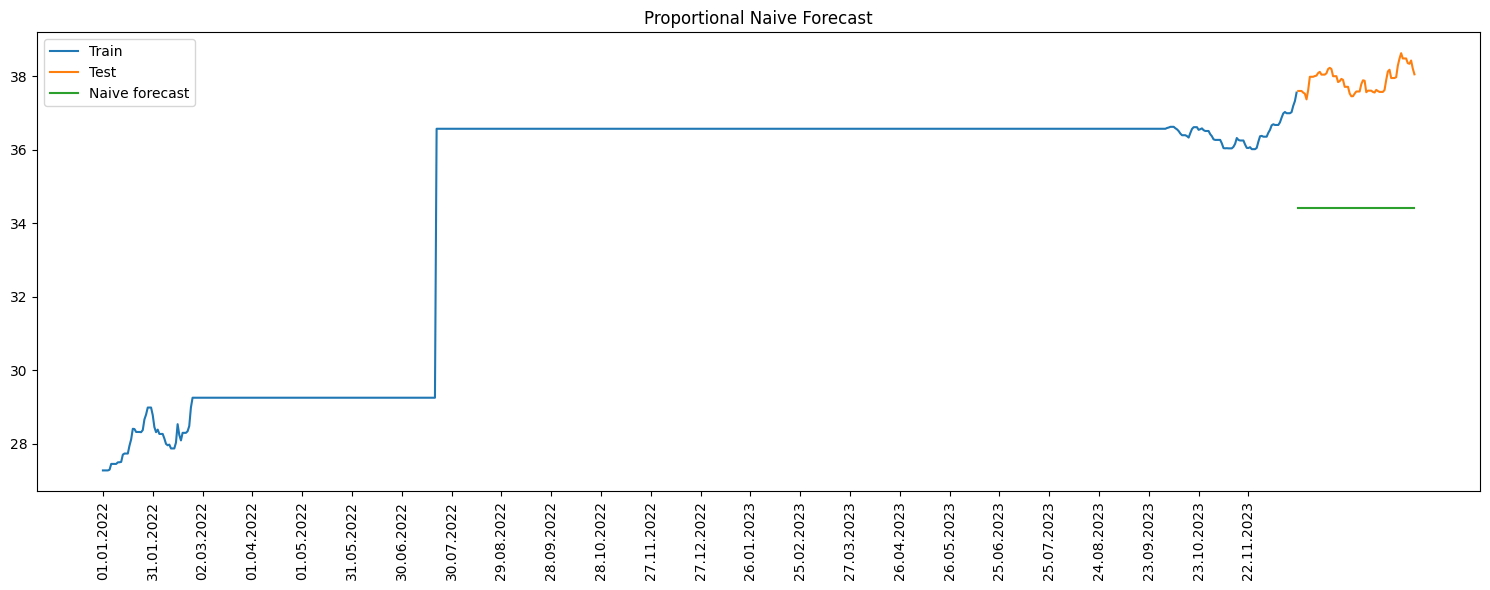

max_error: 4.196563055555551
mean_error: 3.45997573161189
min_error: 2.9412630555555523
median_error: 3.4705630555555516
mode_error: 3.1435630555555534


In [149]:
train_len = 720
train = _data.iloc[:train_len].copy()
test = _data.iloc[train_len:].copy()

y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = 1/train_len * sum(train['Офіційний курс гривні, грн'])

plt.figure(figsize=(15, 6))
plt.plot(train['Дата'], train['Офіційний курс гривні, грн'], label='Train')
plt.plot(test['Дата'], test['Офіційний курс гривні, грн'], label='Test')
plt.plot(y_hat_naive['Дата'], y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Proportional Naive Forecast')
plt.xticks(train['Дата'][::30], rotation=90)
plt.tight_layout()
plt.show()

def calculation_statistic_error(y_true, y_pred):
    errors = y_true - y_pred
    return {
        'max_error': np.max(np.abs(errors)),
        'mean_error': np.mean(errors),
        'min_error': np.min(np.abs(errors)),
        'median_error': np.median(errors),
        'mode_error': stats.mode(errors)[0]
    }

errors = calculation_statistic_error(
    test['Офіційний курс гривні, грн'], 
    y_hat_naive['naive_forecast']
)

for metric, value in errors.items():
    print(f'{metric}: {value}')

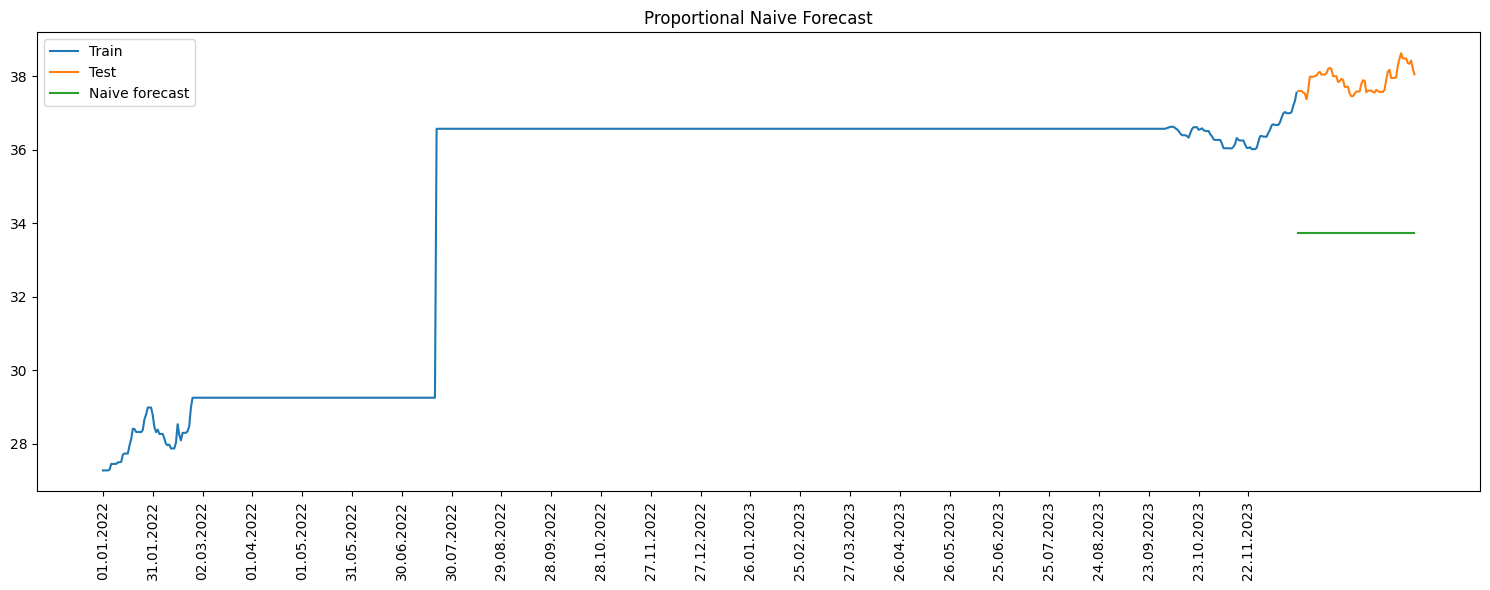

max_error: 4.901727272727271
mean_error: 4.165139948783611
min_error: 3.646427272727273
median_error: 4.175727272727272
mode_error: 3.848727272727274


In [150]:
train_len = 720
train = _data.iloc[:train_len].copy()
test = _data.iloc[train_len:].copy()

k = 10
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = (1/(k+1)) * sum(train['Офіційний курс гривні, грн'][train_len - k:])

plt.figure(figsize=(15, 6))
plt.plot(train['Дата'], train['Офіційний курс гривні, грн'], label='Train')
plt.plot(test['Дата'], test['Офіційний курс гривні, грн'], label='Test')
plt.plot(y_hat_naive['Дата'], y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Proportional Naive Forecast')
plt.xticks(train['Дата'][::30], rotation=90)
plt.tight_layout()
plt.show()

def calculation_statistic_error(y_true, y_pred):
    errors = y_true - y_pred
    return {
        'max_error': np.max(np.abs(errors)),
        'mean_error': np.mean(errors),
        'min_error': np.min(np.abs(errors)),
        'median_error': np.median(errors),
        'mode_error': stats.mode(errors)[0]
    }

errors = calculation_statistic_error(
    test['Офіційний курс гривні, грн'], 
    y_hat_naive['naive_forecast']
)

for metric, value in errors.items():
    print(f'{metric}: {value}')


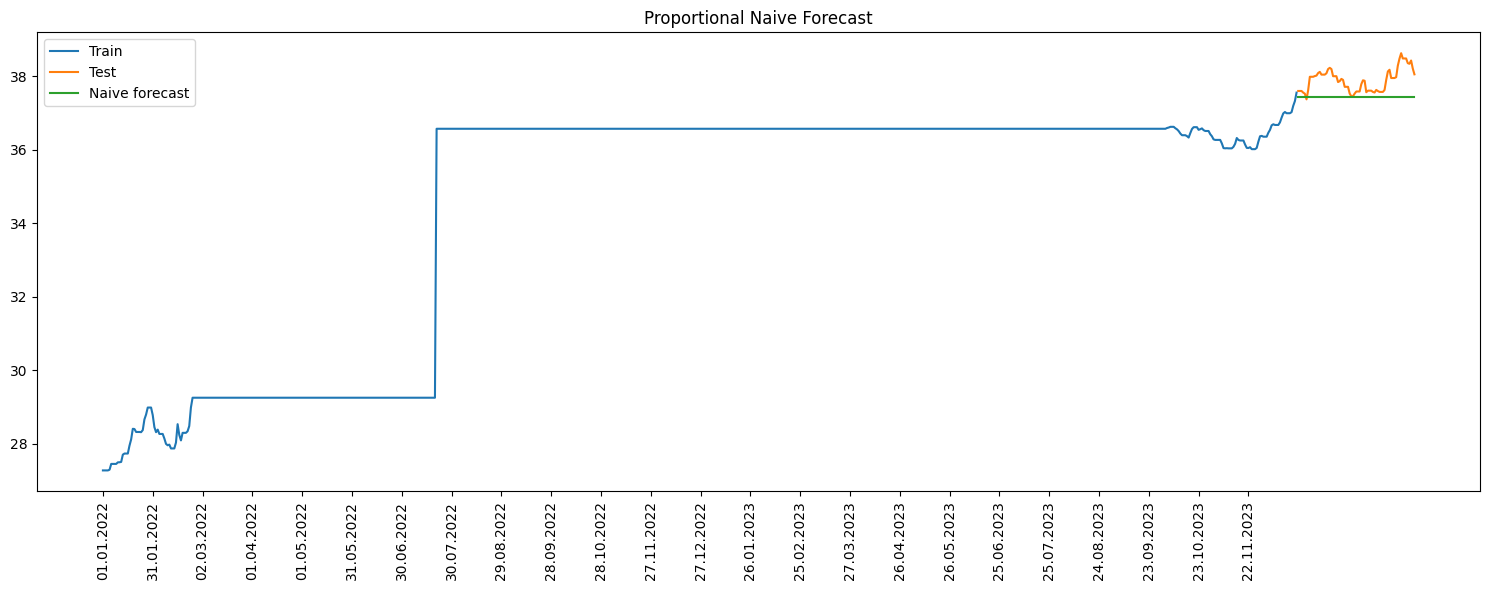

max_error: 1.1876499999999979
mean_error: 0.45106267605633704
min_error: 0.016049999999999898
median_error: 0.4616499999999988
mode_error: 0.1346500000000006


In [151]:

train_len = 720
train = _data.iloc[:train_len].copy()
test = _data.iloc[train_len:].copy()

y_hat_naive = test.copy()
alfa = 0.5
y_hat_naive['naive_forecast'] = alfa * train['Офіційний курс гривні, грн'][train_len - 1] + (1 - alfa) * train['Офіційний курс гривні, грн'][train_len - 2]


plt.figure(figsize=(15, 6))
plt.plot(train['Дата'], train['Офіційний курс гривні, грн'], label='Train')
plt.plot(test['Дата'], test['Офіційний курс гривні, грн'], label='Test')
plt.plot(y_hat_naive['Дата'], y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Proportional Naive Forecast')
plt.xticks(train['Дата'][::30], rotation=90)
plt.tight_layout()
plt.show()


def calculation_statistic_error(y_true, y_pred):
    errors = y_true - y_pred
    return {
        'max_error': np.max(np.abs(errors)),
        'mean_error': np.mean(errors),
        'min_error': np.min(np.abs(errors)),
        'median_error': np.median(errors),
        'mode_error': stats.mode(errors)[0]
    }

errors = calculation_statistic_error(
    test['Офіційний курс гривні, грн'], 
    y_hat_naive['naive_forecast']
)

for metric, value in errors.items():
    print(f'{metric}: {value}')